In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import files


uploaded = files.upload()

Saving glass.csv to glass.csv


In [3]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Data Pre Processing**

In [5]:
X_train = df.drop('Type', axis = 1)
y_train = df['Type']

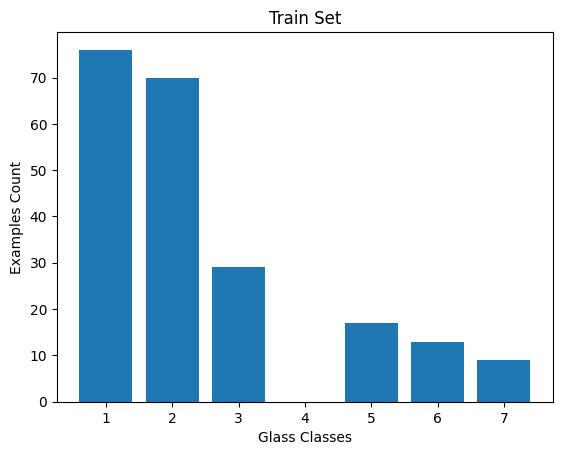

In [6]:
glass_classes=y_train.unique()
values= y_train.value_counts()

plt.bar(glass_classes,values)
plt.title('Train Set')
plt.xlabel('Glass Classes')
plt.ylabel('Examples Count')
plt.show()

In [7]:
X_train= df.values
X_train= normalize(X_train)
print(X_train[0])

[2.06227172e-02 1.84938864e-01 6.08779693e-02 1.49144245e-02
 9.73233994e-01 8.13514066e-04 1.18637468e-01 0.00000000e+00
 0.00000000e+00 1.35585678e-02]


In [8]:
  y_train= to_categorical(y_train)
  y_train.shape

(214, 8)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)

**Building Keras Model**

In [10]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(256, input_shape=(10,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(8, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['acc'])

model

In [11]:
y_train.shape


(171, 8)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [13]:
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=6,
                    validation_data=(X_val, y_val),
                    verbose=1,
                   )

Epoch 1/60
29/29 [==============================] - 3s 15ms/step - loss: 2.7830 - acc: 0.2164 - val_loss: 2.0596 - val_acc: 0.2381
Epoch 2/60
29/29 [==============================] - 0s 6ms/step - loss: 2.1290 - acc: 0.3450 - val_loss: 2.0163 - val_acc: 0.2381
Epoch 3/60
29/29 [==============================] - 0s 6ms/step - loss: 2.2521 - acc: 0.3801 - val_loss: 1.9922 - val_acc: 0.2381
Epoch 4/60
29/29 [==============================] - 0s 7ms/step - loss: 2.0941 - acc: 0.4094 - val_loss: 1.9672 - val_acc: 0.2381
Epoch 5/60
29/29 [==============================] - 0s 6ms/step - loss: 2.0574 - acc: 0.4503 - val_loss: 1.9622 - val_acc: 0.2381
Epoch 6/60
29/29 [==============================] - 0s 6ms/step - loss: 1.8202 - acc: 0.4678 - val_loss: 1.9426 - val_acc: 0.2381
Epoch 7/60
29/29 [==============================] - 0s 7ms/step - loss: 1.7046 - acc: 0.4912 - val_loss: 1.9687 - val_acc: 0.2381
Epoch 8/60
29/29 [==============================] - 0s 7ms/step - loss: 1.5713 - acc: 0.5

**Plotting Model Accuracy**

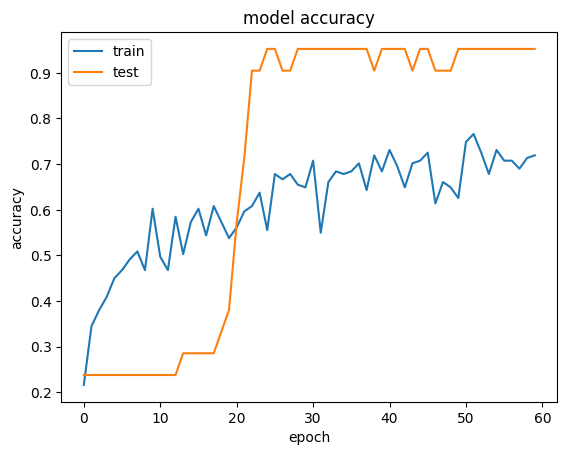

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model Evaluation**

In [15]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 61ms/step - loss: 0.0473 - acc: 1.0000


[0.04733864217996597, 1.0]

In [16]:
y_pred = model.predict(X_test)
y_pred_cl = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

confusion_matrix(y_true, y_pred_cl)

1/1 [==============================] - 1s 753ms/step


array([[ 8,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1]])

**Therefore, we can conclude that the Keras Sequential model has performed even better than the Random Forest Classifier model with a validation accuracy of 95.24% and a testing accuracy of 90.91%.**